In [2]:
%pip install pandas
%pip install matplotlib
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


c:\Users\Bryan James M. Uy\AppData\Local\Programs\Python\Python313\python.exe: No module named pip


Note: you may need to restart the kernel to use updated packages.


c:\Users\Bryan James M. Uy\AppData\Local\Programs\Python\Python313\python.exe: No module named pip


Note: you may need to restart the kernel to use updated packages.


c:\Users\Bryan James M. Uy\AppData\Local\Programs\Python\Python313\python.exe: No module named pip


In [3]:
# Get the data csv
import pandas as pd

df = pd.read_csv("./data/reinforced_dataset.csv")
df = df.replace(",", "", regex=True)
print(df)

     year region  population_estimate_15_over  employment_rate  \
0    2018    ncr                       9186.0             93.4   
1    2018    car                       1270.0             95.9   
2    2018      1                       3520.0             93.2   
3    2018      2                       2403.0             97.0   
4    2018      3                       7889.0             94.2   
..    ...    ...                          ...              ...   
114  2025     10                          NaN              NaN   
115  2025     11                          NaN              NaN   
116  2025     12                          NaN              NaN   
117  2025     13                          NaN              NaN   
118  2025  barmm                          NaN              NaN   

     unemployment_rate  poverty_urban  poverty_rural  index_crime  \
0                  6.6         311.53            NaN      14650.0   
1                  4.1          25.37         188.93       1159.0   


In [ ]:
#make new columns to calculate poverty rate, index and non index crime rates, in terms of percentages per region
#note: the population to serve as the basis is the region's total employable population (>15 yo)
df['poverty_rate'] = ((df['poverty_rural'].fillna(0) + df['poverty_urban'].fillna(0))/df['population_estimate_15_over'])*100
df['index_crime_rate'] = df['index_crime']/df['population_estimate_15_over']/1000*100
df['nonindex_crime_rate'] = df['nonindex_crime']/df['population_estimate_15_over']/1000*100
df['total_crime_rate'] = df['index_crime_rate']+df['nonindex_crime_rate']
print(df[['year','region','poverty_rate','employment_rate','total_crime_rate']].head(100))

    year region  poverty_rate  employment_rate  total_crime_rate
0   2018    ncr      3.391356             93.4          1.579240
1   2018    car     16.874016             95.9          0.565354
2   2018      1     14.487784             93.2          0.887216
3   2018      2     24.100707             97.0          0.482147
4   2018      3     10.621245             94.2          0.545101
..   ...    ...           ...              ...               ...
95  2023      8     41.549360             96.2          0.172620
96  2023      9     45.985843             96.9          0.196631
97  2023     10     36.311373             94.7          0.231200
98  2023     11     23.852240             96.9          0.554257
99  2023     12     34.682449             96.8          0.157209

[100 rows x 5 columns]


In [16]:
employment_rates_df = df[['year','region','employment_rate','total_crime_rate']]
poverty_rates_df = df[['year','region','poverty_rate','total_crime_rate']]

rates_df = df[['year','region','poverty_rate','employment_rate','total_crime_rate']]
rates_df.to_csv("data/rates_dataset.csv", index=False)



employment: All
poverty: rm 2019, 2020. 2022
crime: rm 2019

In [18]:

employment_rates_df = employment_rates_df[~employment_rates_df["year"].isin([2019,2025])]
poverty_rates_df = poverty_rates_df[~poverty_rates_df["year"].isin([2019,2020,2022,2025])]
employment_rates_df.to_csv('data/employment_rates_dataset.csv',index=False)
poverty_rates_df.to_csv('data/poverty_rates_dataset.csv',index=False)




   region  poverty_rate  employment_rate  total_crime_rate
0     ncr      1.811309        92.000000          0.604537
1     car      6.965186        94.950000          0.218856
2       1      9.044710        92.533333          0.326378
3       2     10.403152        95.383333          0.349915
4       3      6.454563        93.183333          0.296684
5      4a      6.204898        92.216667          0.322786
6      4b     15.286248        94.616667          0.215671
7       5     21.466598        93.633333          0.308550
8       6      6.480360        94.383333          0.268046
9       7     12.006343        93.900000          0.622367
10      8     21.834481        94.683333          0.217868
11      9     22.888478        95.183333          0.269668
12     10     18.119715        95.100000          0.277366
13     11     12.815307        95.133333          0.604790
14     12     18.698192        95.066667          0.266943
15     13     20.996200        95.066667          0.3519

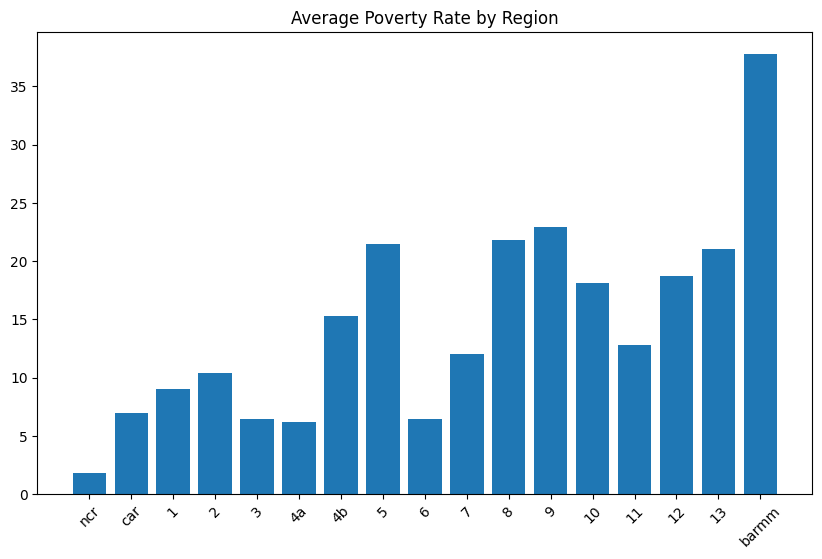

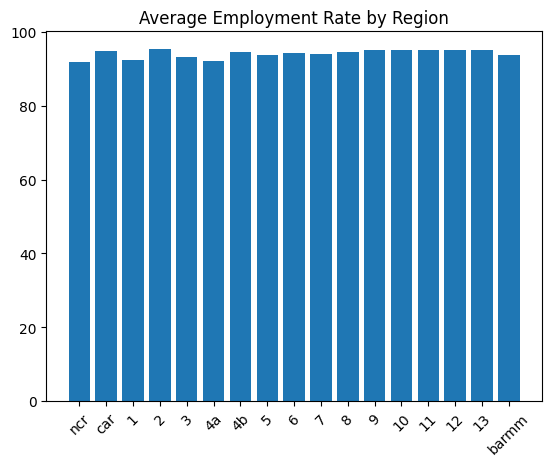

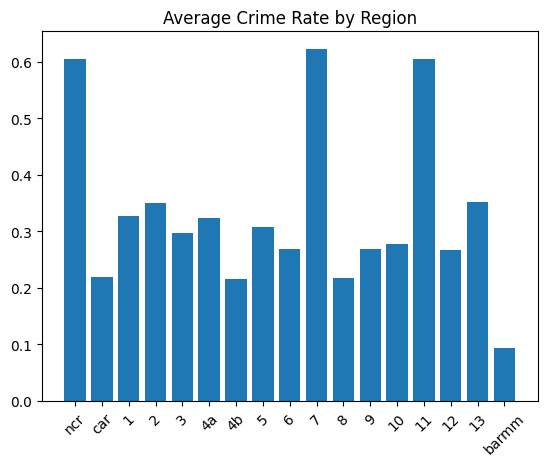

In [23]:
import numpy as np
import matplotlib.pyplot as plt
# Bar Chart (Regional Comparison)

region_avg = rates_df.groupby("region")[["poverty_rate", "employment_rate", "total_crime_rate"]].mean().sort_values("region").reset_index()

region_list = [
    "ncr",
    "car",
    "1",
    "2",
    "3",
    "4a",
    "4b",
    "5",
    "6",
    "7",
    "8",
    "9",
    "10",
    "11",
    "12",
    "13",
    "barmm",
]
# Sort according to region list
region_avg["region"] = pd.Categorical(region_avg["region"], categories=region_list, ordered=True)
region_avg = region_avg.sort_values("region").reset_index(drop=True)

print(region_avg)


regions = 17
x = np.arange(len(region_avg["region"]))

# Poverty Comparison
plt.figure(figsize=(10, 6))
plt.bar(range(regions), region_avg["poverty_rate"])
plt.title("Average Poverty Rate by Region")
plt.xticks(x, region_avg["region"], rotation=45)
plt.show()

# Employment Comparison
plt.bar(range(regions), region_avg["employment_rate"])
plt.title("Average Employment Rate by Region")
plt.xticks(x, region_avg["region"], rotation=45)
plt.show()

# Crime Comparison
plt.bar(range(regions), region_avg["total_crime_rate"])
plt.title("Average Crime Rate by Region")
plt.xticks(x, region_avg["region"], rotation=45)
plt.show()

takeaways: showing poverty and crime in terms of rates reduces the relative difference in magnitude for outlier regions (in this case ncr and BARMM)

next: scatter plot for each region 

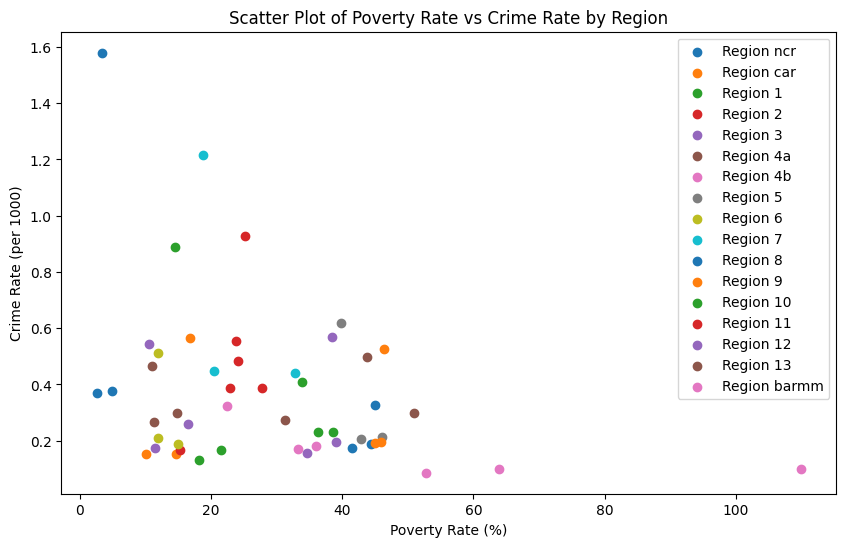

In [34]:



plt.figure(figsize=(10,6))

for region in poverty_rates_df['region'].unique():
    subset = poverty_rates_df[poverty_rates_df['region'] == region]
    plt.scatter(subset['poverty_rate'], subset['total_crime_rate'], label=f'Region {region}')

plt.xlabel('Poverty Rate (%)')
plt.ylabel('Crime Rate (per 1000)')
plt.title('Scatter Plot of Poverty Rate vs Crime Rate by Region')
plt.legend()
plt.show()

In [ ]:

plt.figure(figsize=(10,6))

for region in employment_rates_df['region'].unique():
    subset = employment_rates_df[employment_rates_df['region'] == region]
    plt.scatter(subset['employment_rate'], subset['total_crime_rate'], label=f'Region {region}')

plt.xlabel('Employment Rate (%)')
plt.ylabel('Crime Rate (per 1000)')
plt.title('Scatter Plot of Employment Rate vs Crime Rate by Region')
plt.legend()
plt.show()

KeyError: 'poverty_rate'

<Figure size 1000x600 with 0 Axes>